<a href="https://colab.research.google.com/github/asafeareas/data_science_ai__ml_job_salaries/blob/main/data_science%2C_ai__ml_job_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Introduction
The exploratory data analysis (EDA) presented in this study aims to investigate salary trends in the fields of Data Science, Artificial Intelligence, and Machine Learning. Using a dataset containing information from various regions, job titles, and experience levels, we seek to identify salary patterns, geographic disparities, and key factors influencing compensation in the tech industry.

Through visualizations and descriptive statistics, this analysis provides valuable insights for both early-career professionals and senior executives looking to better understand the current job market landscape in technology.

# Importing libraries, analyzing types and cleaning databases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving salaries.csv to salaries.csv


In [ ]:
df = pd.read_csv('/content/salaries.csv')

df.shape
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.isnull().sum()
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [ ]:
df = df.drop_duplicates()


# START OF EXPLORATORY DATA ANALYSIS

#Step 1: Overall Salary Distribution


--- 1. Analysis of Overall Salary Distribution ---


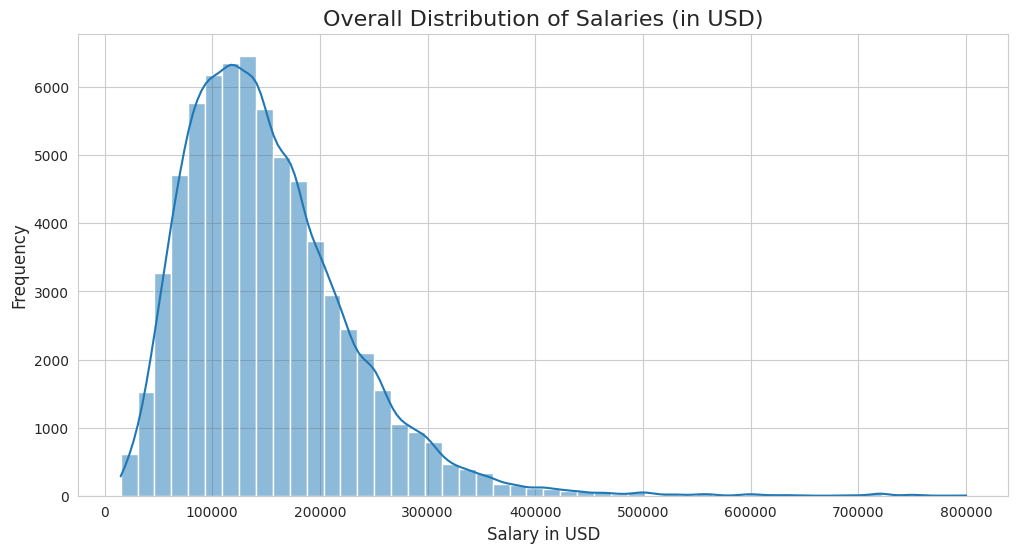

In [ ]:
print("--- 1. Analysis of Overall Salary Distribution ---")
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.histplot(df['salary_in_usd'], kde=True, bins=50)
plt.title('Overall Distribution of Salaries (in USD)', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The histogram is heavily right-skewed. This indicates that while the majority of jobs have salaries
concentrated in the lower-to-mid range (approx. $100k - $300k), there are a number of positions with
exceptionally high salaries that extend the tail to the right. Because of this skew, the median will be a
more representative measure of the central tendency than the mean. The presence of these high salaries
are likely outliers, which we will investigate later.

# Step 2: Salary Distribution by Experience Level


--- 2. Analysis of Salary by Experience Level ---


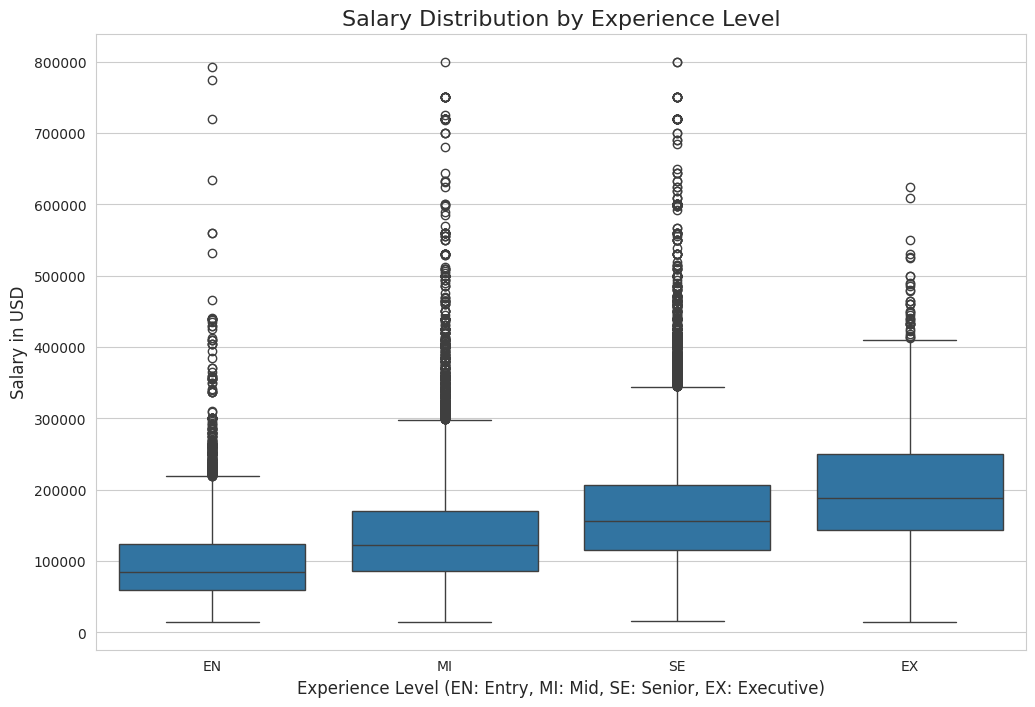

In [ ]:
print("\n--- 2. Analysis of Salary by Experience Level ---")
# Define a logical order for experience levels
experience_order = ['EN', 'MI', 'SE', 'EX']
# Convert to a categorical type to ensure correct plotting order
df['experience_level'] = pd.Categorical(df['experience_level'], categories=experience_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=experience_order)
plt.title('Salary Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level (EN: Entry, MI: Mid, SE: Senior, EX: Executive)', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.show()

The boxplot clearly illustrates a strong, positive correlation between experience level and salary.
- Entry-level (EN) salaries are the lowest and have the smallest variance.
- Mid-level (MI) salaries show a clear jump from entry-level.
- Senior-level (SE) salaries represent another significant increase and contain the widest interquartile range.
- Executive-level (EX) professionals have the highest median salary and the widest overall salary range,
  indicating high variability based on factors like company size, specific role, and location.
This confirms the expected career progression and associated financial rewards in the data science field.

# Step 3: Salary Distribution by Top 10 Company Locations


--- 3. Analysis of Salary by Top 10 Company Locations ---


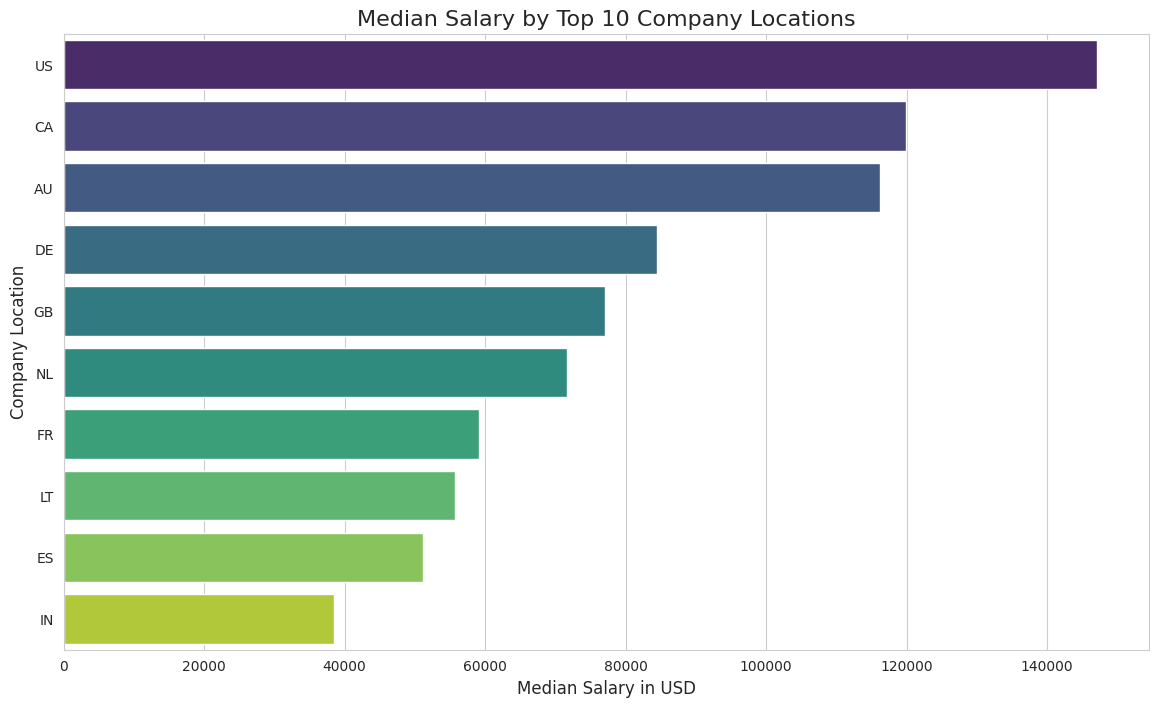

In [ ]:
print("\n--- 3. Analysis of Salary by Top 10 Company Locations ---")
top_10_locations = df['company_location'].value_counts().nlargest(10).index
df_top_locations = df[df['company_location'].isin(top_10_locations)]

# Calculate median salary and sort for better visualization
median_salary_by_location = df_top_locations.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_salary_by_location.values, y=median_salary_by_location.index, palette='viridis')
plt.title('Median Salary by Top 10 Company Locations', fontsize=16)
plt.xlabel('Median Salary in USD', fontsize=12)
plt.ylabel('Company Location', fontsize=12)
plt.show()

Among the countries with the highest number of data science jobs, the United States (US) offers a
significantly higher median salary compared to other major hubs like Great Britain (GB), Canada (CA),
and Germany (DE). India (IN) has a high volume of jobs but a comparatively lower median salary, which
likely reflects differences in the cost of living and market maturity. This visualization is crucial for
professionals considering international relocation, as it highlights the stark economic differences
between major tech markets.

# Step 4: Salary Distribution by Top 10 Job Titles


--- 4. Analysis of Salary by Top 10 Job Titles ---


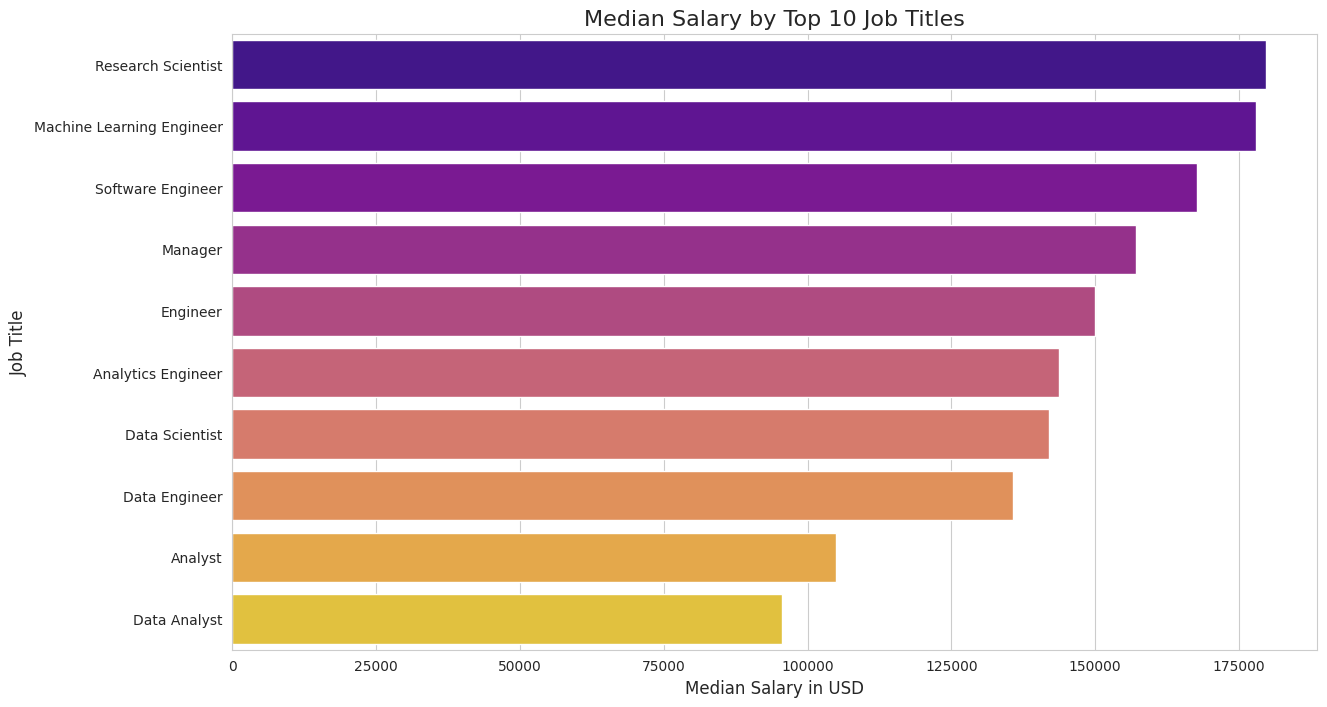

In [ ]:
print("\n--- 4. Analysis of Salary by Top 10 Job Titles ---")
top_10_jobs = df['job_title'].value_counts().nlargest(10).index
df_top_jobs = df[df['job_title'].isin(top_10_jobs)]

# Calculate median salary and sort for better visualization
median_salary_by_job = df_top_jobs.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_salary_by_job.values, y=median_salary_by_job.index, palette='plasma')
plt.title('Median Salary by Top 10 Job Titles', fontsize=16)
plt.xlabel('Median Salary in USD', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()

Within the most common roles, there is a clear hierarchy. Specialized roles like Machine Learning Engineer
and Research Scientist command the highest median salaries, reflecting high demand for their skills.This chart helps job seekers understand the salary
landscape for specific roles and can guide career development towards more lucrative specializations.

# Step 5: Outlier Detection and Removal using IQR


--- 5. Outlier Detection and Removal ---
Original shape: (67888, 11)
Shape after removing outliers: (66238, 11)
Number of outliers removed: 1650


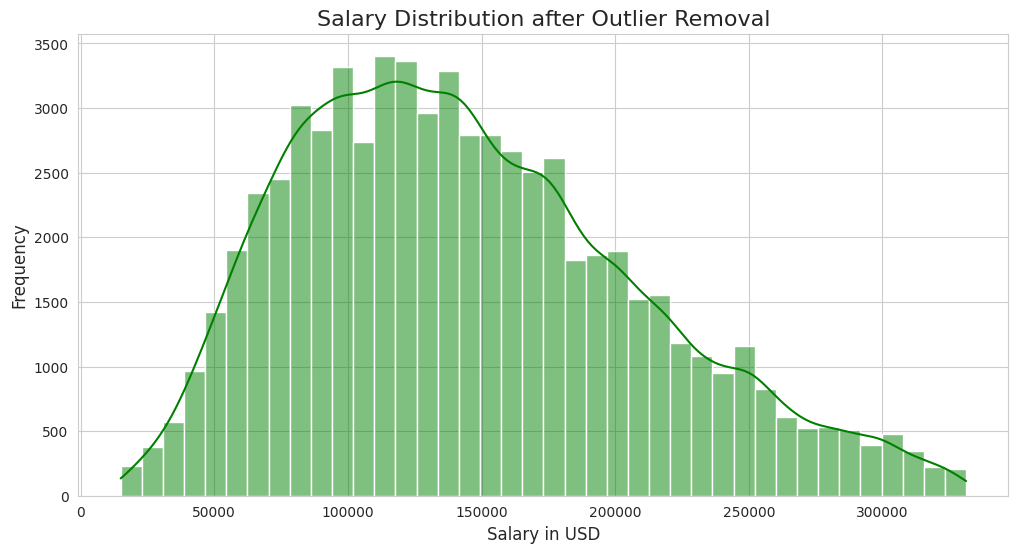

By applying the IQR method, we removed records with salaries considered to be extreme outliers.
The new distribution is much less skewed and more concentrated, giving us a more accurate view of the 'typical'
salary range in the data science field. The bulk of salaries now clearly falls between approximately $60,000
and $300,000. For any modeling tasks, using this cleaned dataset (df_no_outliers) is highly recommended
to prevent the model from being biased by extreme values.

# Step 6: Correlation Analysis & Preparation for Machine Learning


--- 6. Correlation Analysis & Preparation for Machine Learning ---


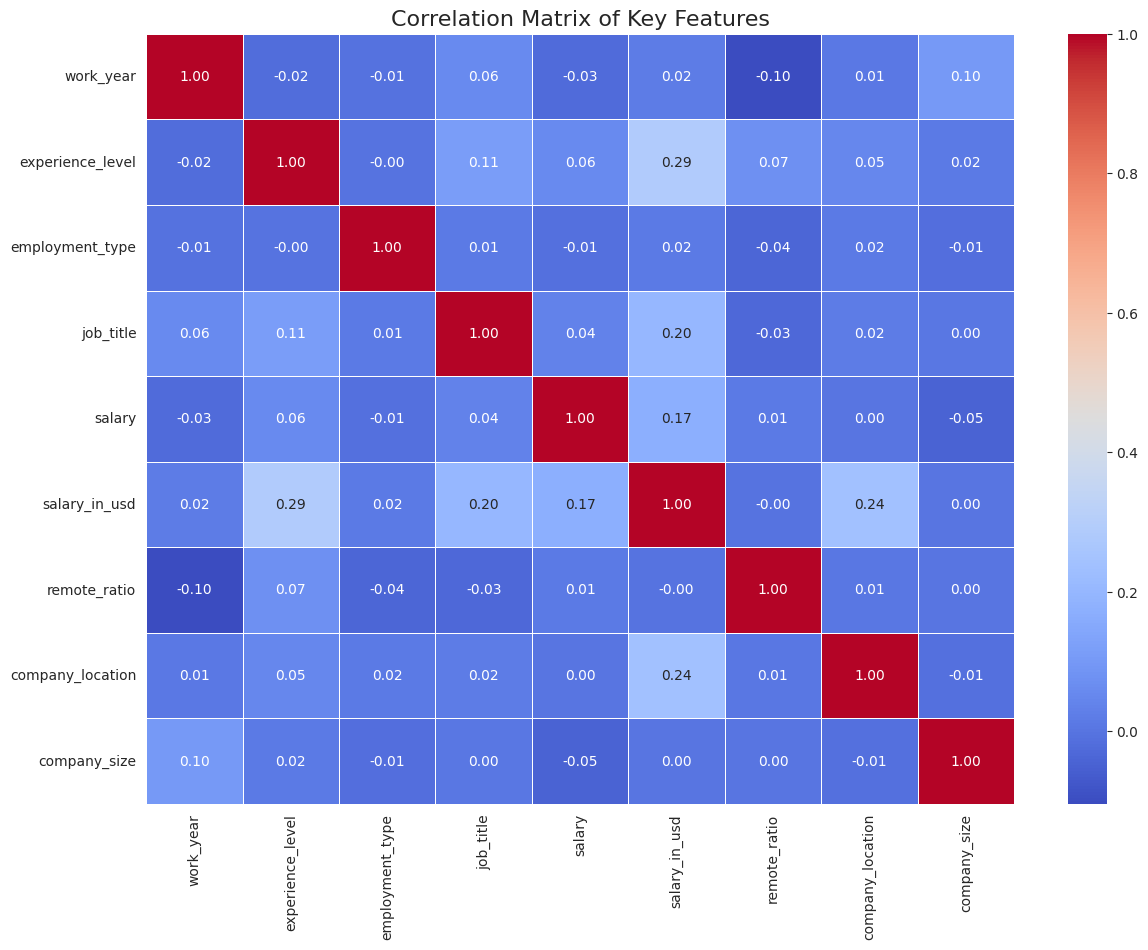

In [ ]:
print("\n--- 6. Correlation Analysis & Preparation for Machine Learning ---")
# For this step, we will use the DataFrame with outliers removed for more stable results.
from sklearn.preprocessing import LabelEncoder

df_encoded = df_no_outliers.copy()

# We will encode categorical columns. LabelEncoder converts each category into a number.
categorical_cols = ['experience_level', 'employment_type', 'company_size', 'company_location', 'job_title']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Select only numerical columns for the correlation matrix
numerical_df = df_encoded.select_dtypes(include=np.number)

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.show()

The heatmap visually confirms our earlier findings and reveals new relationships:
- **`salary_in_usd` and `experience_level` (0.29):** This shows a moderate positive correlation, quantitatively
  confirming that as experience level increases, salary tends to increase. This is the strongest predictive
  feature for salary in our dataset.
- **`salary_in_usd` and `company_location` (0.24):** This also shows a positive correlation. The encoded
  location number captures the strong effect of location (especially the high salaries in the US) on salary.
- **`remote_ratio` and `salary_in_usd` (-0.00):** according to the heat map, there is no correlation between remote work and dollar salary.

This heatmap is a vital tool for feature selection in a machine learning context. Features with higher
absolute correlation values with `salary_in_usd` are likely to be more important for a predictive model.

# Exploratory Data Analysis Complete

# 📌 Conclusion
The analysis revealed a strong positive correlation between experience level and salary, with executive positions and specialized roles such as Machine Learning Engineer and Research Scientist standing out as the highest earners. The United States leads in terms of median salaries, while countries with large labor markets such as India show significantly lower compensation, likely due to differences in cost of living and market maturity.

After handling outliers, we achieved a clearer view of the typical salary range, allowing for more accurate interpretations. The correlation matrix highlighted experience and geographic location as key predictors for salary modeling.

This analysis serves as a solid foundation for strategic career decisions, compensation planning, and can also be used as a starting point for machine learning models applied to human resources.


📊 Author: Asafe Dorea de Oliveira Arêas

🔗 [LinkedIn](https://br.linkedin.com/in/asafe-ar%C3%AAas)

📧 Contact Email: asafedorea12@gmail.com